# Explore NLP

#### Exploration boils down to ONE question
... How do we quantify our data??

#### Visualize:
- word frequency (by label)
- ngrams
- word clouds
- sentiment analysis
- other common features

<hr style="border:2px solid black"> </hr>

## Imports

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns

<hr style="border:2px solid black"> </hr>

## Setup

- This data is spam (and ham) text messages

In [2]:
#dictate size of figure
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def clean(text):
    '''
    This function is a simplified text cleaning function
    '''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
#read in the csv
df = pd.read_csv('./spam_clean.csv')

#look at shape
print(df.shape)

#look at data
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#see the count for each label.
df.label.value_counts()

#there are many more ham messages than spam messages

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
#take a look at all ham messages only
df[df.label == 'ham'].text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [9]:
#real texts that are cleaned
ham_words = clean(' '.join(df[df.label == 'ham'].text))
ham_words

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni u dun say so early hor u c already then say nah i dont think he goes to usf he lives around here though even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times i have a date on sunday with will oh kim watching here eh u remember how 2 spell his name yes i did he v naughty make until i v wet fine if thataos the way u feel thataos the way its gota b is that seriously how you spell his name ium going

In [5]:
#real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

#all messages
all_words = clean(' '.join(df.text))

<hr style="border:2px solid black"> </hr>

## Explore
- represent text as word frequencies

In [10]:
#look for all the words
all_words.split()

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'u',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'then',
 'say',
 'nah',
 'i',
 'dont',
 'think',
 'he',
 'goes',
 'to',
 'usf',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'freemsg',
 'hey',
 'there',
 'darling',
 'its',
 'been',
 '3',
 'weeks',
 'now',
 'and',
 'no',
 'word',
 'back',
 'id',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'a150',
 'to',
 'rcv',
 'even',
 'my',
 'brother',
 'is',
 'no

In [11]:
#turn all words into a series
#get value count of all words
pd.Series(all_words.split()).value_counts()

#removing stopwords would change this count

i                2350
to               2240
you              2124
a                1431
the              1322
                 ... 
blowing             1
absolutely          1
l8tr                1
poortiyagi          1
unconsciously       1
Length: 9557, dtype: int64

In [12]:
#create a series with words split and value counts for each word
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [13]:
#index=word, value=#of times it occurs
spam_freq

to             686
a              376
call           347
you            287
your           263
              ... 
01223585236      1
crazyin          1
spiderman        1
09094646631      1
42810            1
Length: 3033, dtype: int64

In [14]:
#combine all frequency into single Series
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each text type
word_counts.columns = ['ham', 'spam', 'all']

#take a look
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [16]:
#sorted by most common to least common in 'all' textss
word_counts.sort_values('all', ascending=False).head(30)

#'i' is much more frequent in ham than spam

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [17]:
#show all the words that appear 0 times in ham
word_counts[word_counts.ham == 0]

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
...,...,...,...
01223585236,0,1,1
crazyin,0,1,1
spiderman,0,1,1
09094646631,0,1,1


In [18]:
#show all the words that appear 0 times in spam
word_counts[word_counts.spam == 0]

,ham,spam,all
ltgt,276,0,276
he,184,0,184
lor,160,0,160
later,134,0,134
da,131,0,131
...,...,...,...
rinu,1,0,1
limits,1,0,1
receipts,1,0,1
tallahassee,1,0,1


In [22]:
#most frequent in ham, least frequent in spam
word_counts.sort_values(['ham', 'spam'],ascending=[False,True]).head(30)

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431
u,986,147,1133
and,848,122,970
in,811,73,884
me,756,30,786
my,743,10,753


<hr style="border:3px solid black"> </hr>

# Visualize

Text(0, 0.5, 'Word')

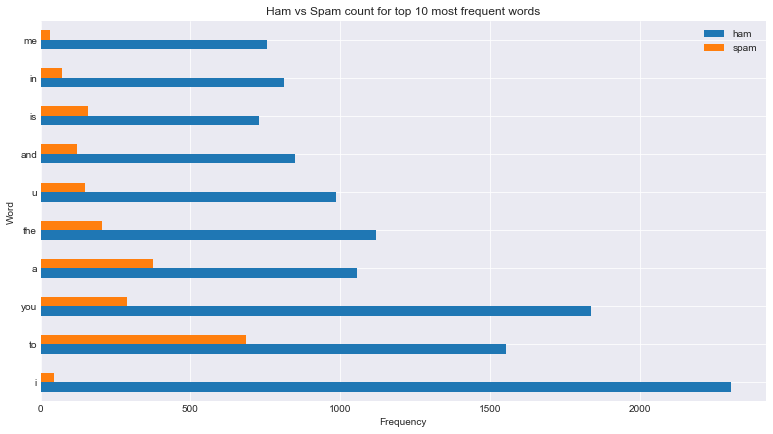

In [25]:
#using 'all' texts
#visualize top 20 of ham and spam
word_counts.sort_values('all', ascending=False).head(10)[['ham', 'spam']].plot.barh()

plt.title('Ham vs Spam count for top 10 most frequent words')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [28]:
#visual proportions
#axis=1 in .apply means row by row
word_counts.sort_values(by='all', ascending=False).head(10).apply(lambda row: row/ row['all'],axis=1)

,ham,spam,all
i,0.980851,0.019149,1.0
to,0.693750,0.306250,1.0
you,0.864878,0.135122,1.0
a,0.737247,0.262753,1.0
the,0.845688,0.154312,1.0
u,0.870256,0.129744,1.0
and,0.874227,0.125773,1.0
is,0.821670,0.178330,1.0
in,0.917421,0.082579,1.0
me,0.961832,0.038168,1.0


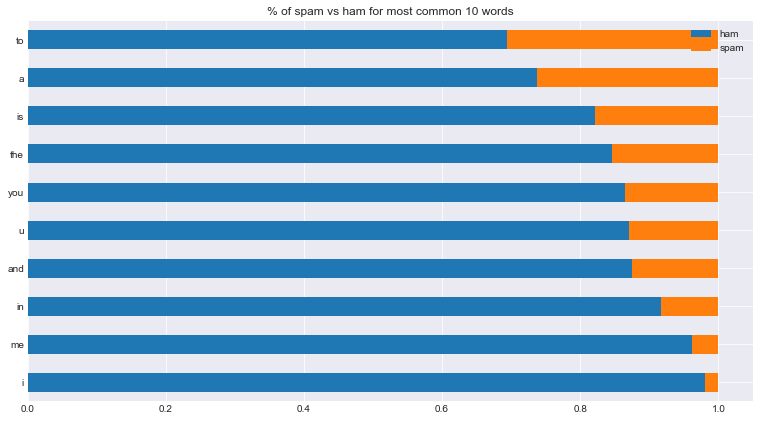

In [34]:
#visualize only ham and spam as percent of 'all'
(word_counts.sort_values(by='all', ascending=False)
 .head(10)
 .apply(lambda row: row/ row['all'],axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True))
plt.title('% of spam vs ham for most common 10 words')
None

<hr style="border:2px solid black"> </hr>

## n-grams
- combination of words together
- **common mistake**: make bigrams out of **WORDS** only

In [35]:
sentence = 'Today is tuesday, and the weather is nice'

In [37]:
#split the sentence into words
sentence.split()

['Today', 'is', 'tuesday,', 'and', 'the', 'weather', 'is', 'nice']

In [39]:
#put list of two word combos together
list(nltk.bigrams(sentence.split()))

[('Today', 'is'),
 ('is', 'tuesday,'),
 ('tuesday,', 'and'),
 ('and', 'the'),
 ('the', 'weather'),
 ('weather', 'is'),
 ('is', 'nice')]

In [40]:
#turn bigrams for spam words into a series
pd.Series(nltk.bigrams(spam_words.split()))

0                   (free, entry)
1                     (entry, in)
2                         (in, 2)
3                          (2, a)
4                       (a, wkly)
                   ...           
17588                (now1, only)
17589                 (only, 10p)
17590                  (10p, per)
17591               (per, minute)
17592    (minute, btnationalrate)
Length: 17593, dtype: object

In [41]:
#see most common bigrams in spam texts
pd.Series(nltk.bigrams(spam_words.split())).value_counts()

(you, have)          73
(have, won)          54
(your, mobile)       49
(to, claim)          46
(please, call)       44
                     ..
(marvel, mobile)      1
(calls, help)         1
(20pmin, gsex)        1
(09071512432, b4)     1
(txt, entry)          1
Length: 8719, dtype: int64

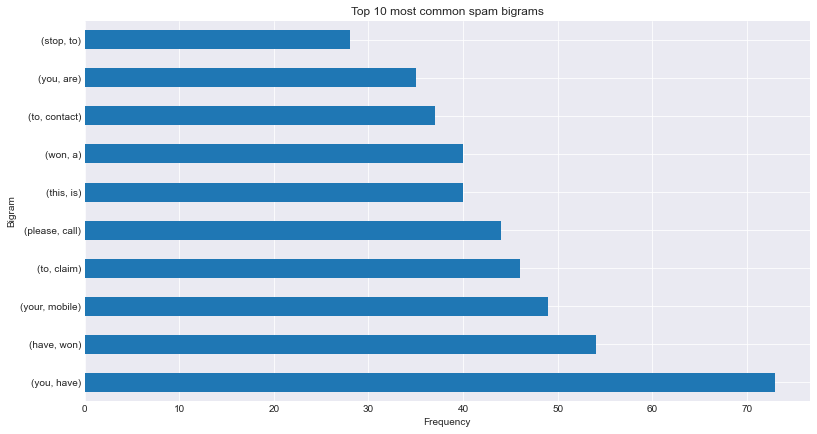

In [45]:
#visualize top ten
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

<hr style="border:2px solid black"> </hr>

## Word Cloud

In [48]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

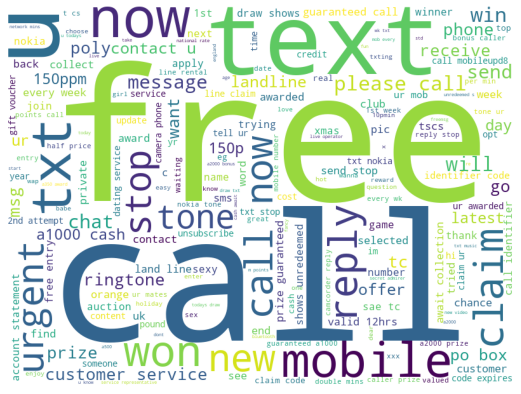

In [52]:
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

<hr style="border:2px solid black"> </hr>

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio (plagerism detection)

In [78]:
#character count, how long is the text message
df['message_length'] = df.text.apply(len)
df.head()

,label,text,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
#see length of ham texts vs spam texts
df.groupby('label').message_length.mean()

label
ham      71.023627
spam    138.866131
Name: message_length, dtype: float64

Text(0.5, 0, 'message length')

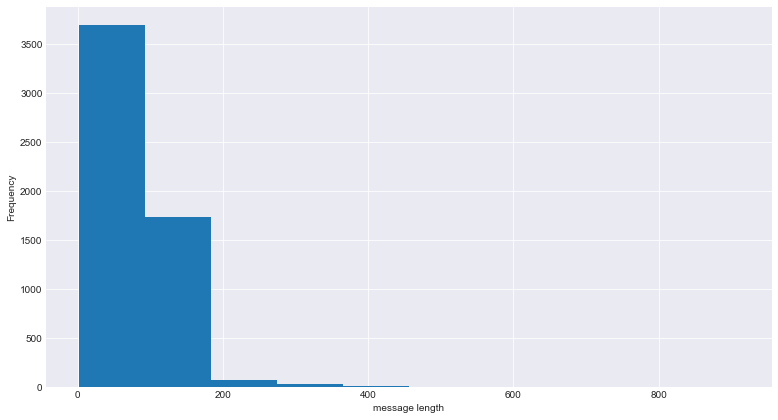

In [80]:
df.message_length.plot.hist()
plt.xlabel('message length')

In [83]:
#word count
#split string into single words and get length
df['word_count'] = df.text.apply(clean).apply(str.split).apply(len)
df.word_count

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569     9
5570    26
5571     6
Name: word_count, Length: 5572, dtype: int64

Text(0.5, 0, 'message length')

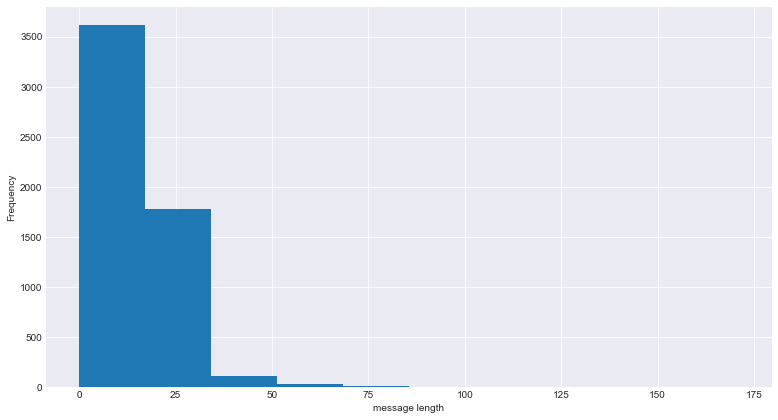

In [84]:
#visualize word count
df.word_count.plot.hist()
plt.xlabel('word count')

Text(0.5, 1.0, 'message legth vs word count $r=.95$')

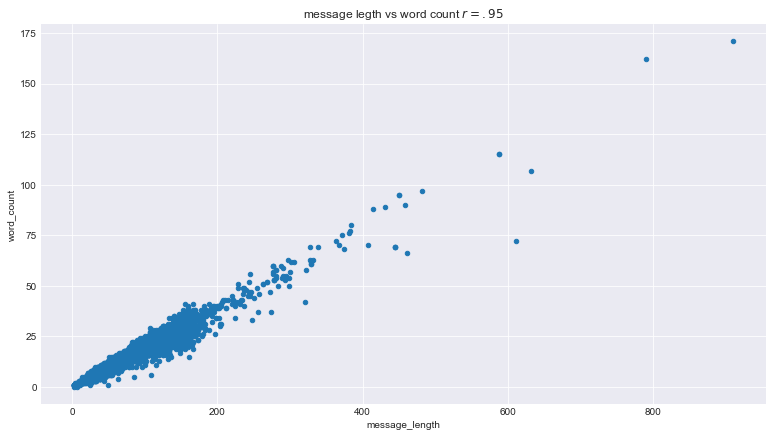

In [88]:
#visualize the word vs message length
#positive correlation
df.plot.scatter(y='word_count', x='message_length')
plt.title('message legth vs word count $r=.95$')

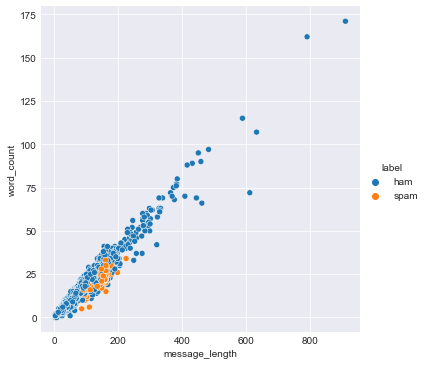

In [91]:
#visualize word vs message length with label
sns.relplot(data=df, y='word_count', x='message_length', hue ='label')

#can see that ham messages are much longer than spam

#### Specific Fields:
- twitter data: number of likes
- reddit data: number of up votes, number of down votes
- customer satisfaction: time it takes to respond

<hr style="border:2px solid black"> </hr>

## Sentiment
- a number which tells us if a piece of text is positive or negative

#### Derived by:
- knowledge-based + statistical approach
- relies on human-labelled data
    - valence scored wordlists
    - overall labels, measure is how well it compares to human judgement
- different models for diff domains (e.g. social media vs news)
for social media
    - Afinn (github + whitepaper)
    - Vader: specifically for social media

In [93]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/natasharivers/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [96]:
import nltk.sentiment

In [97]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [98]:
#apply the sentence
sia.polarity_scores('The weather is nice today.')

#shows positive sentiment

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [99]:
#apply the sentence
sia.polarity_scores('The weather is terrible today.')

#shows negative sentiment

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

In [100]:
#apply the sentence
sia.polarity_scores('The service is shit.')

#shows negative sentiment

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}

In [101]:
#apply the sentence
#just adding one word completely changes sentiment
sia.polarity_scores('The service is the shit.')

#shows positive sentiment

{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124}

<hr style="border:1px solid black"> </hr>

In [103]:
#get a list of numbers indicating sentiment on texts
df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.sentiment

0       0.6249
1       0.4767
2       0.7964
3       0.0000
4      -0.1027
         ...  
5567    0.8805
5568    0.0000
5569   -0.2960
5570    0.8934
5571    0.7579
Name: sentiment, Length: 5572, dtype: float64

In [104]:
#take a look at sentiment vs other variables
df.head()

,label,text,message_length,word_count,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,-0.1027
